In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
py.offline.init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/netflix_processed.csv')
netflix.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre,country_list,director_list,cast_list
0,TV Show,3%,Other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,"['International TV Shows', 'TV Dramas', 'TV Sc...",['Brazil'],['Other'],"['João Miguel', 'Bianca Comparato', 'Michel Go..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,medium,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,"['Dramas', 'International Movies']",['Mexico'],['Jorge Michel Grau'],"['Demián Bichir', 'Héctor Bonilla', 'Oscar Ser..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,short,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,"['Horror Movies', 'International Movies']",['Singapore'],['Gilbert Chan'],"['Tedd Chan', 'Stella Chung', 'Henley Hii', 'L..."


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           7656 non-null   object
 1   title          7656 non-null   object
 2   director       7656 non-null   object
 3   cast           7656 non-null   object
 4   country        7656 non-null   object
 5   date_added     7656 non-null   object
 6   release_year   7656 non-null   int64 
 7   rating         7656 non-null   object
 8   duration       7654 non-null   object
 9   listed_in      7656 non-null   object
 10  description    7656 non-null   object
 11  year_added     7656 non-null   int64 
 12  genre          7656 non-null   object
 13  country_list   7656 non-null   object
 14  director_list  7656 non-null   object
 15  cast_list      7656 non-null   object
dtypes: int64(2), object(14)
memory usage: 957.1+ KB


In [5]:
print(netflix.isnull().sum())

type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         2
listed_in        0
description      0
year_added       0
genre            0
country_list     0
director_list    0
cast_list        0
dtype: int64


In [6]:
#to view the row which has null value.

is_NaN = netflix.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = netflix[row_has_NaN]
rows_with_NaN

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre,country_list,director_list,cast_list
946,Movie,Black Mirror: Bandersnatch,Other,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28 00:00:00,2018,TV-MA,NaN,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,"['Dramas', 'International Movies', 'Sci-Fi & F...",['United States'],['Other'],"['Fionn Whitehead', 'Will Poulter', 'Craig Par..."
6728,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21 00:00:00,1973,TV-14,NaN,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020,"['Comedies', 'Dramas', 'International Movies']",['Egypt'],['Houssam El-Din Mustafa'],"['Suhair El-Babili', 'Adel Emam', 'Saeed Saleh..."


In [7]:
#to drop the null rows

netflix.dropna(inplace=True)

In [8]:
# Drop Duplicates

netflix.drop_duplicates(inplace= True)

In [9]:
#converting into datetime type

netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['month_added']=netflix['date_added'].dt.month
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre,country_list,director_list,cast_list,month_added
0,TV Show,3%,Other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,"['International TV Shows', 'TV Dramas', 'TV Sc...",['Brazil'],['Other'],"['João Miguel', 'Bianca Comparato', 'Michel Go...",8
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,medium,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,"['Dramas', 'International Movies']",['Mexico'],['Jorge Michel Grau'],"['Demián Bichir', 'Héctor Bonilla', 'Oscar Ser...",12


In [10]:
netflix['month_name_added'] = netflix['date_added'].dt.month_name()

# Journey of netflix throughout two decades

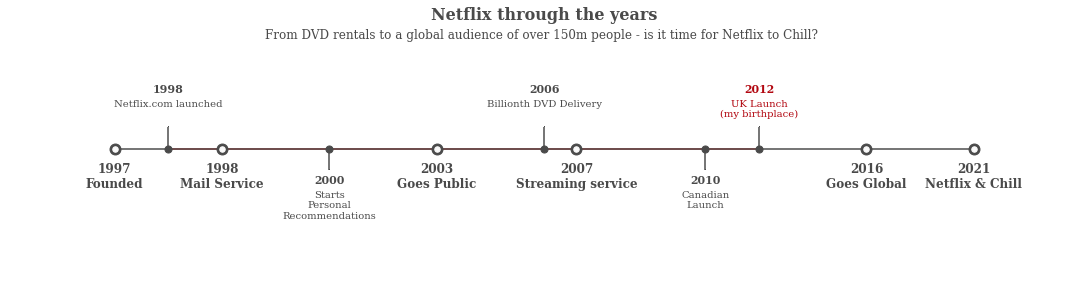

In [11]:
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

#Distribution of movies and tv-shows in netflix

In [12]:
x = netflix.groupby(["type"])['type'].count()
x

type
Movie      5284
TV Show    2370
Name: type, dtype: int64

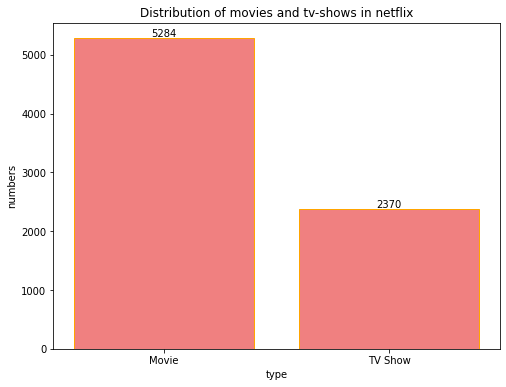

In [13]:
# Distribution of movies and tv-shows in 

plt.figure(figsize = (8,6))
plt.bar(x.index, x.values, align='center',color='lightcoral', edgecolor = 'orange')
plt.title('Distribution of movies and tv-shows in netflix')
plt.xlabel('type')
plt.ylabel('numbers')
yaxis = x.values
xaxis = x.index
for i in range(len(yaxis)):
  plt.annotate(str(yaxis[i]), xy=(xaxis[i], yaxis[i]), ha='center', va='bottom') 


### So we now know there are much more movies than TV shows on Netflix.

In [14]:
# Lets retrieve just the first country
netflix['first_country'] = netflix['country'].apply(lambda x: x.split(",")[0])
netflix['first_country'].head()


0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: first_country, dtype: object

In [15]:
# Reducing name length

netflix['first_country'].replace('United States', 'USA', inplace=True)
netflix['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix['first_country'].replace('South Korea', 'S. Korea',inplace=True)

##Which are all countries has high distribution of movies and tv shows in netflix?

In [16]:
data = netflix.groupby('first_country').size().sort_values(ascending=False)[:10]
data

first_country
USA         2809
India        943
UK           570
Other        491
Canada       256
Japan        235
France       193
S. Korea     193
Spain        167
Mexico       121
dtype: int64

## Distribution by bar plot

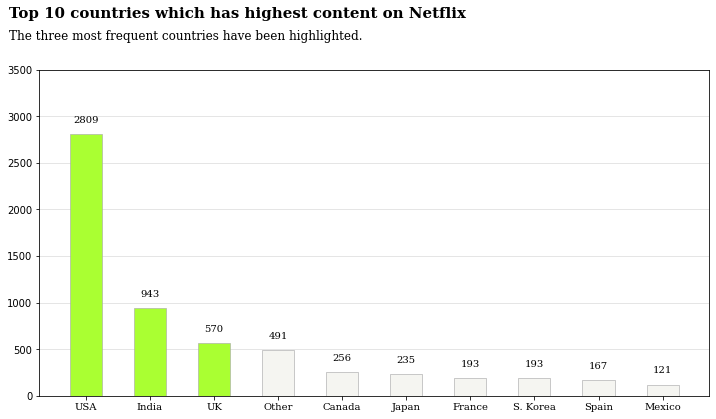

In [104]:
# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#AAFF32' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(str(data[i]), 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries which has highest content on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.show()

**The highest number of movies and TV shows in netflix are from USA and then INDIA**

## 3.) Percentage of movies and tv shows by countrywise

In [18]:
country_order = netflix['first_country'].value_counts()[:11].index
country_order

Index(['USA', 'India', 'UK', 'Other', 'Canada', 'Japan', 'S. Korea', 'France',
       'Spain', 'Mexico', 'Australia'],
      dtype='object')

In [19]:
data_q2q3 = netflix[['type', 'first_country']].groupby(['first_country','type']).size().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)

In [20]:
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

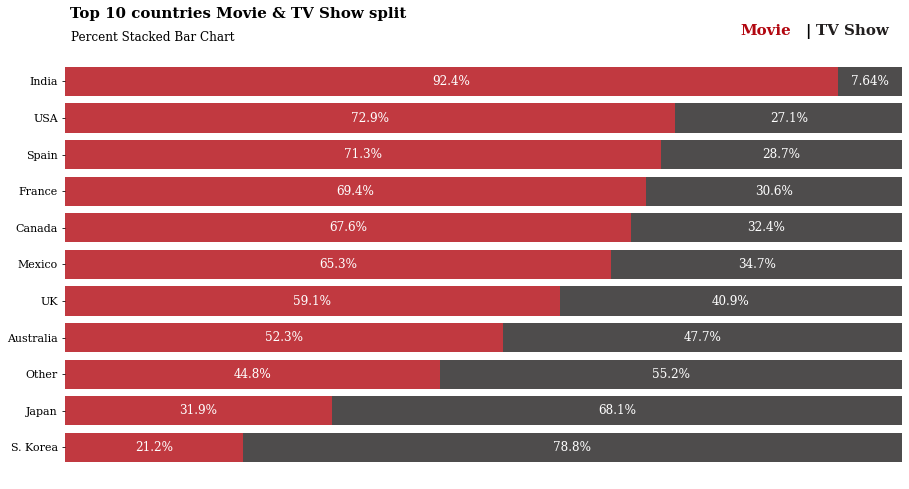

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')  


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()


In Netflix India, the content type is most entirely of Movies. 

On the other hand, South Korean Netflix is 
almost filled entirely TV Shows.

This is the biggest insights from the above plot.

Netflix content varies based on each country's demand

## How much content were increased over the years in netflix

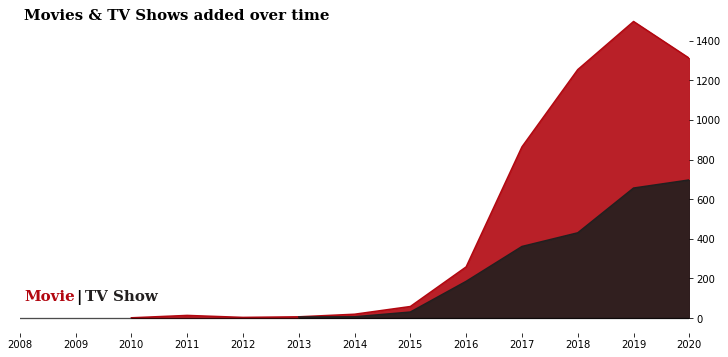

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix['type'].value_counts().index):
    mtv_rel = netflix[netflix['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()    

We see a slow start for Netflix over several years. 

Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic

# We can view the same plot, but as a cumulative total..

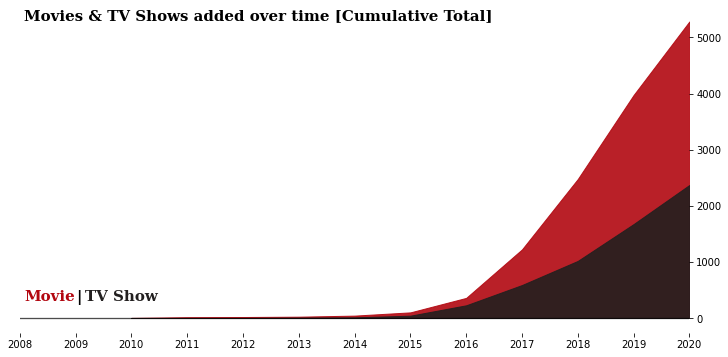

In [59]:
data_sub1 = netflix.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=1).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix['type'].value_counts().index):
    mtv_rel = data_sub1[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)    

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()    

 * It appears that Netflix has focused more attention
on increasing Movie content than TV Shows. 

* Movies have increased much more dramatically
than TV shows.

In [61]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

netflix['month_name_added'] = pd.Categorical(netflix['month_name_added'], categories=month_order, ordered=True)



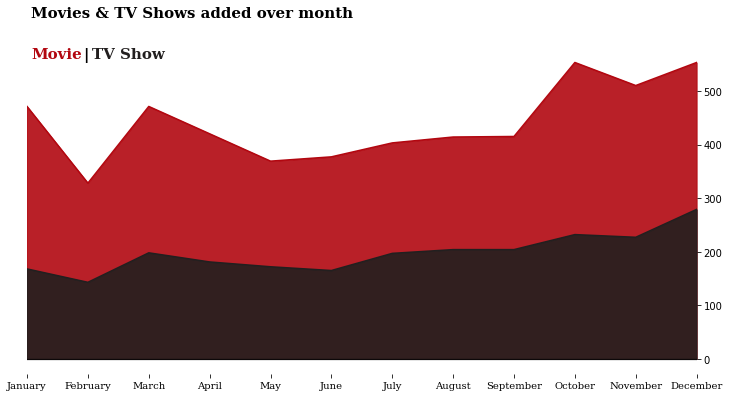

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix['type'].value_counts().index):
    mtv_rel = netflix[netflix['type']==mtv]['month_name_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xticklabels(month_order, fontfamily='serif', rotation=0)
ax.margins(x=0)


fig.text(0.13, 0.95, 'Movies & TV Shows added over month', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()    

## **Rating wise content distribution across country**

In [70]:
netflix['count'] = 1

In [75]:
data1 = netflix.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data1

,first_country,count
0,USA,2809
1,India,943
2,UK,570
3,Other,491
4,Canada,256
5,Japan,235
6,S. Korea,193
7,France,193
8,Spain,167
9,Mexico,121


In [79]:
df_heatmap = netflix[netflix['first_country'].isin(data1["first_country"].values)]

df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['rating'],normalize = "index").T

In [89]:
df_heatmap

rating,G,NC-17,NR,Other,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
first_country,,,,,,,,,,,,,,,
Canada,0.007812,0.003906,0.015625,0.000000,0.042969,0.027344,0.125000,0.136719,0.058594,0.324219,0.105469,0.082031,0.066406,0.003906,0.000000
France,0.005181,0.005181,0.005181,0.000000,0.041451,0.031088,0.067358,0.139896,0.010363,0.549223,0.020725,0.072539,0.046632,0.000000,0.005181
India,0.000000,0.000000,0.005302,0.000000,0.002121,0.004242,0.002121,0.559915,0.009544,0.249205,0.146341,0.005302,0.013786,0.001060,0.001060
Japan,0.000000,0.000000,0.000000,0.004255,0.021277,0.012766,0.000000,0.336170,0.004255,0.361702,0.174468,0.004255,0.080851,0.000000,0.000000
Mexico,0.000000,0.000000,0.033058,0.000000,0.000000,0.016529,0.057851,0.115702,0.016529,0.677686,0.057851,0.000000,0.024793,0.000000,0.000000
Other,0.000000,0.000000,0.000000,0.002037,0.004073,0.006110,0.002037,0.274949,0.032587,0.309572,0.130346,0.136456,0.099796,0.002037,0.000000
S. Korea,0.005181,0.000000,0.015544,0.000000,0.000000,0.000000,0.005181,0.367876,0.005181,0.440415,0.077720,0.036269,0.046632,0.000000,0.000000
Spain,0.005988,0.000000,0.005988,0.000000,0.023952,0.017964,0.017964,0.089820,0.005988,0.778443,0.029940,0.023952,0.000000,0.000000,0.000000
UK,0.003509,0.000000,0.015789,0.000000,0.019298,0.068421,0.135088,0.142105,0.038596,0.371930,0.152632,0.036842,0.014035,0.000000,0.001754


## Plotting Heatmap for the above matrix

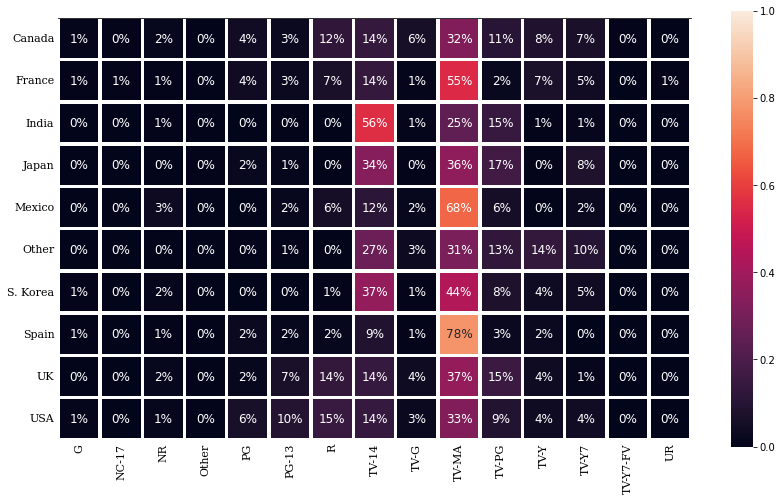

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.heatmap(df_heatmap,square=True, linewidth=2.5,cbar=True,
            annot=True,fmt='1.0%',vmax=1,vmin=0,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

#fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
#fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

## **Overview of Netflix movie titles**

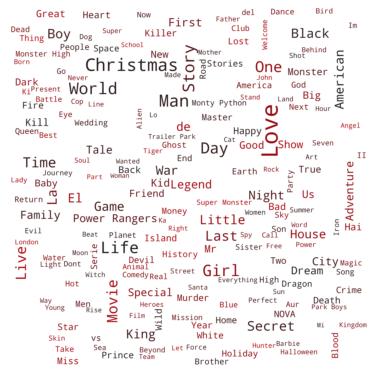

In [102]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(netflix['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/netlix_icon.png'))

wordcloud = WordCloud(background_color = 'white', width = 400,  height = 300,colormap=cmap, max_words = 200, mask = mask).generate(text)

plt.figure( figsize=(8,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

It is interesting to note that many films share the same key words in their titles.